In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sas

In [8]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Series Temporais/price.csv')
# Dataset de ações da apple

In [9]:
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2008-10-01,3.997143,4.012857,3.835357,3.897143,3.327505,1296484000
1,2008-10-02,3.857500,3.885357,3.571429,3.575000,3.052449,1609364400
2,2008-10-03,3.714286,3.803571,3.380357,3.466786,2.960053,2294398400
3,2008-10-06,3.284286,3.527857,3.126429,3.505000,2.992681,2107417200
4,2008-10-07,3.588571,3.625000,3.176786,3.184286,2.718845,1878772000


In [13]:
dataset['Mean'] =(dataset['Low'] + dataset['High'])/2
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Mean
0,2008-10-01,3.997143,4.012857,3.835357,3.897143,3.327505,1296484000,3.924107
1,2008-10-02,3.857500,3.885357,3.571429,3.575000,3.052449,1609364400,3.728393
2,2008-10-03,3.714286,3.803571,3.380357,3.466786,2.960053,2294398400,3.591964
3,2008-10-06,3.284286,3.527857,3.126429,3.505000,2.992681,2107417200,3.327143
4,2008-10-07,3.588571,3.625000,3.176786,3.184286,2.718845,1878772000,3.400893


In [16]:
steps = -1
dataset_for_prediction =  dataset.copy()
dataset_for_prediction['Actual'] = dataset_for_prediction['Mean'].shift(steps)
dataset_for_prediction.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Mean,Actual
0,2008-10-01,3.997143,4.012857,3.835357,3.897143,3.327505,1296484000,3.924107,3.728393
1,2008-10-02,3.857500,3.885357,3.571429,3.575000,3.052449,1609364400,3.728393,3.591964
2,2008-10-03,3.714286,3.803571,3.380357,3.466786,2.960053,2294398400,3.591964,3.327143
3,2008-10-06,3.284286,3.527857,3.126429,3.505000,2.992681,2107417200,3.327143,3.400893
4,2008-10-07,3.588571,3.625000,3.176786,3.184286,2.718845,1878772000,3.400893,3.250179


In [17]:
dataset_for_prediction = dataset_for_prediction.dropna()

In [19]:
# Transformando a coluna date no tipo datetime e colocando como index do dataset
dataset_for_prediction['Date'] = pd.to_datetime(dataset_for_prediction['Date'])
dataset_for_prediction.index = dataset_for_prediction['Date']

<Axes: xlabel='Date'>

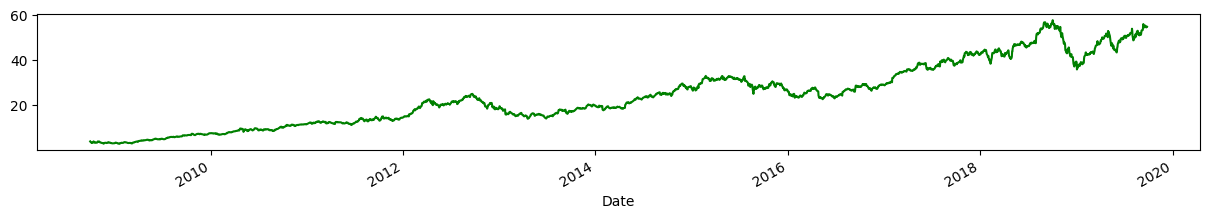

In [21]:
# Plotando o gráfico do tempo
dataset_for_prediction['Mean'].plot(color='green', figsize=(15,2))

Parece que temos uma tendencia positiva

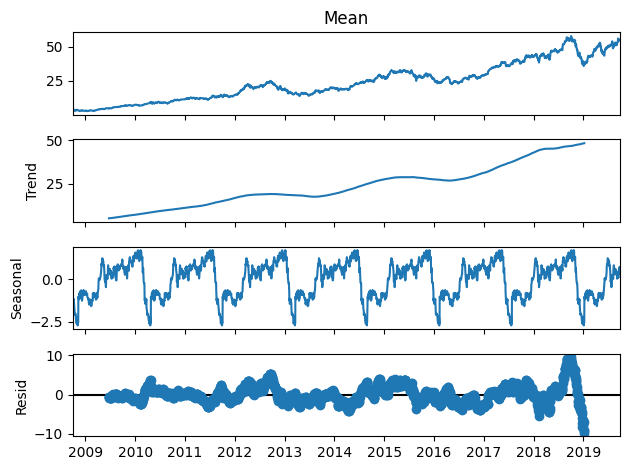

In [24]:
import statsmodels.api as sm

sd = sm.tsa.seasonal_decompose(dataset_for_prediction['Mean'], model='add', period=365)

fig = sd.plot()
plt.show()

Ajustando a base para em seguida separar em treino e teste

In [41]:
from sklearn.preprocessing import MinMaxScaler
sc_in = MinMaxScaler(feature_range=(0,1))
scaled_input = sc_in.fit_transform(dataset_for_prediction[["Low", "High", "Open", "Close", "Volume", "Adj Close", "Mean"]])
scaled_input = pd.DataFrame(scaled_input)

x = scaled_input

In [42]:
from sklearn.preprocessing import MinMaxScaler
sc_in = MinMaxScaler(feature_range=(0,1))
scaled_output = sc_in.fit_transform(dataset_for_prediction[['Actual']])
scaled_output = pd.DataFrame(scaled_output)

y = scaled_output

In [43]:
# Variáveis explicativas

x.rename(columns={0:"Low", 1:"High", 2:"Open", 3:"Close", 4:"Volume", 5:"Adj Close", 6:"Mean"},inplace=True)

# O índice do DataFrame x é ajustado para ser o mesmo que o índice do DataFrame original dataset_for_prediction:
x.index = dataset_for_prediction.index
x.head()

,Low,High,Open,Close,Volume,Adj Close,Mean
Date,,,,,,,
2008-10-01,0.019075,0.019558,0.021177,0.019996,0.556275,0.017620,0.019318
2008-10-02,0.014246,0.017258,0.018632,0.014163,0.695398,0.012480,0.015763
2008-10-03,0.010750,0.015783,0.016021,0.012203,1.000000,0.010753,0.013284
2008-10-06,0.006104,0.010810,0.008183,0.012895,0.916858,0.011363,0.008474
2008-10-07,0.007025,0.012562,0.013730,0.007088,0.815191,0.006246,0.009813


In [44]:
y.rename(columns={0:"Preco_acao"},inplace=True)

# O índice do DataFrame x é ajustado para ser o mesmo que o índice do DataFrame original dataset_for_prediction:
y.index = dataset_for_prediction.index
y.head()

,Preco_acao
Date,
2008-10-01,0.015763
2008-10-02,0.013284
2008-10-03,0.008474
2008-10-06,0.009813
2008-10-07,0.007075


Separando em treino e teste

In [47]:
train_size =  int(len(dataset)*0.7)
test_size = int(len(dataset)) -train_size

train_x, train_y = x[:train_size].dropna(), y[:train_size].dropna()

test_x, testy = x[train_size:].dropna(), y[train_size:].dropna()

In [48]:
!pip install scipy

In [49]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 7.5 MB/s eta 0:00:00


In [50]:
from pmdarima.arima import auto_arima

In [53]:
step_wise = auto_arima(train_y,
                       exogenous= train_x,
                       start_P=1, start_q =1,
                       max_p=7, max_q=7,
                       d=1, max_d=7,
                       trace=True,
                       error_action='ignore',
                       suppress_warnings=True,
                       stepwise=True
                       )

Performing stepwise search to minimize aic
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-15130.794, Time=3.32 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-15077.042, Time=0.54 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-15127.374, Time=0.49 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-15132.095, Time=1.28 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-15075.928, Time=0.22 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-15130.709, Time=0.43 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-15130.986, Time=1.18 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-15130.275, Time=4.93 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-15131.797, Time=1.51 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 13.933 seconds


In [54]:
step_wise.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1936
Model:               SARIMAX(0, 1, 1)   Log Likelihood                7569.047
Date:                Thu, 25 Jan 2024   AIC                         -15132.095
Time:                        10:52:18   BIC                         -15115.391
Sample:                             0   HQIC                        -15125.952
                               - 1936                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0002      0.000      1.414      0.157    -7.4e-05       0.000
ma.L1          0.1723      0.013     13.155      0.000       0.147       0.198
sigma2      2.339e-05   3.08e-07     75.974      0.000    2.28e-05     2.4e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              9198.02
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               8.10   Skew:                            -0.37
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [55]:
train_x = np.array(train_x)

train_y = np.array(train_y)

In [58]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train_y,
                exog=train_x,
                order=(0,1,1),
                enforce_invertibility=False,
                enforce_stationarity=False
                )

In [61]:
result = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [64]:
predicoes = result.predict(start= train_size, end=train_size+test_size+(steps)-1, exog=test_x)

## Analisar se o nosso modelo se comportou bem com a serie temporal

In [71]:
act = pd.DataFrame(scaled_output.iloc[train_size:, 0])

In [72]:
act.index = test_x.index

In [74]:
predicoes = pd.DataFrame(predicoes)
predicoes.reset_index(drop=True, inplace= True)
predicoes.index= test_x.index

predicoes['Actual'] = act['Preco_acao']
predicoes.rename(columns={0:'Pred'}, inplace=True)

<Axes: xlabel='Date'>

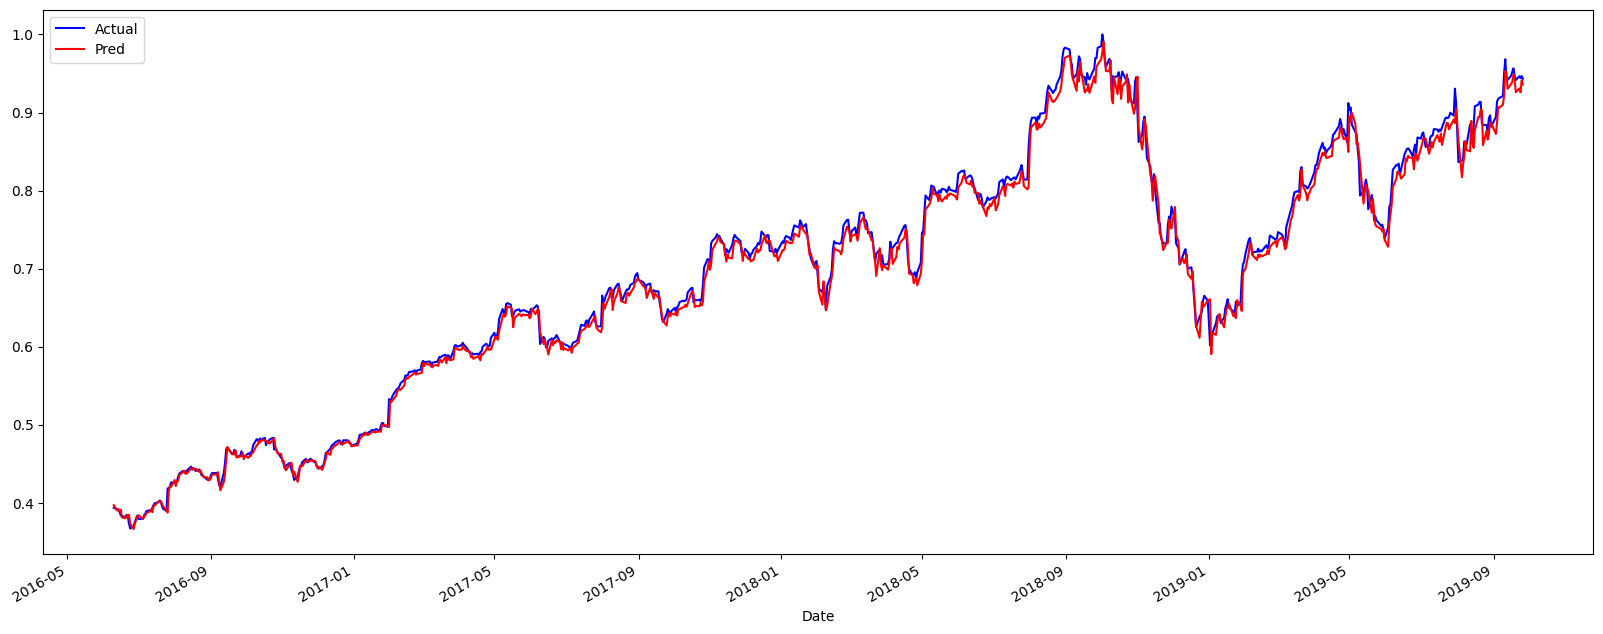

In [76]:
predicoes['Actual'].plot(figsize=(20,8), legend=True, color='blue')
predicoes['Pred'].plot(legend=True, color='red', figsize=(20,8))

### Podemos ver que o nosso modelo se adaptou muito bem ao caso

In [78]:
from statsmodels.tools.eval_measures import mse
error = mse(predicoes['Pred'], predicoes['Actual'])
error

# Um erro médio bem pequeno, o que mostra a qualidade do modelo feito

0.00013821411633853532